# Fitting a calibration model for the cutinase assay
To compare observations to model predictions and accounting for measurement uncertainties, the enzymatic assay needs to be calibrated. Here, we parse data and fit the calibration model. The saved model (json) can be reloaded in other notebooks for analysis purposes.

## Import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import calibr8
from matplotlib import pyplot
import os
import string


import cutisplit
import run_analysis


print(f"calibr8 {calibr8.__version__}")

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


calibr8 6.2.0


In [3]:
DCS_EXPERIMENT = 'TiGr_PETase_Screening'
RUN_ID = "BZACW9"
analyser = run_analysis.CutisplitAnalysis(DCS_EXPERIMENT, RUN_ID)
resultpath = f'{RUN_ID}_Results' 
if not os.path.isdir(resultpath):
    os.makedirs(resultpath)
df_calibration = analyser.get_df_calibration(repetition=1)

To translate between absorbance readings and product concentration, the model needs a `calibr8` calibration model for p-Nitrophenol absorbance/concentration.
We first read the calibration data:

In [4]:
independent = df_calibration.dropna().concentration.values
dependent = df_calibration.dropna().absorbance.values

Now, we can fit the model and save it:

In [5]:
cm_nitrophenol = cutisplit.NitrophenolAbsorbanceModel()
theta_fit, _ = calibr8.fit_scipy(
    model=cm_nitrophenol,
    independent=independent,
    dependent=dependent,
    theta_guess=[0.5, 2, 0.1, 0.1, 30],
    theta_bounds=[
        (0.001, 50)
    ] * len(cm_nitrophenol.theta_names)
)
#cm_nitrophenol.save(fr"{resultpath}\{RUN_ID}_cm_nitrophenol.json")

Finally, we can visualize our model:

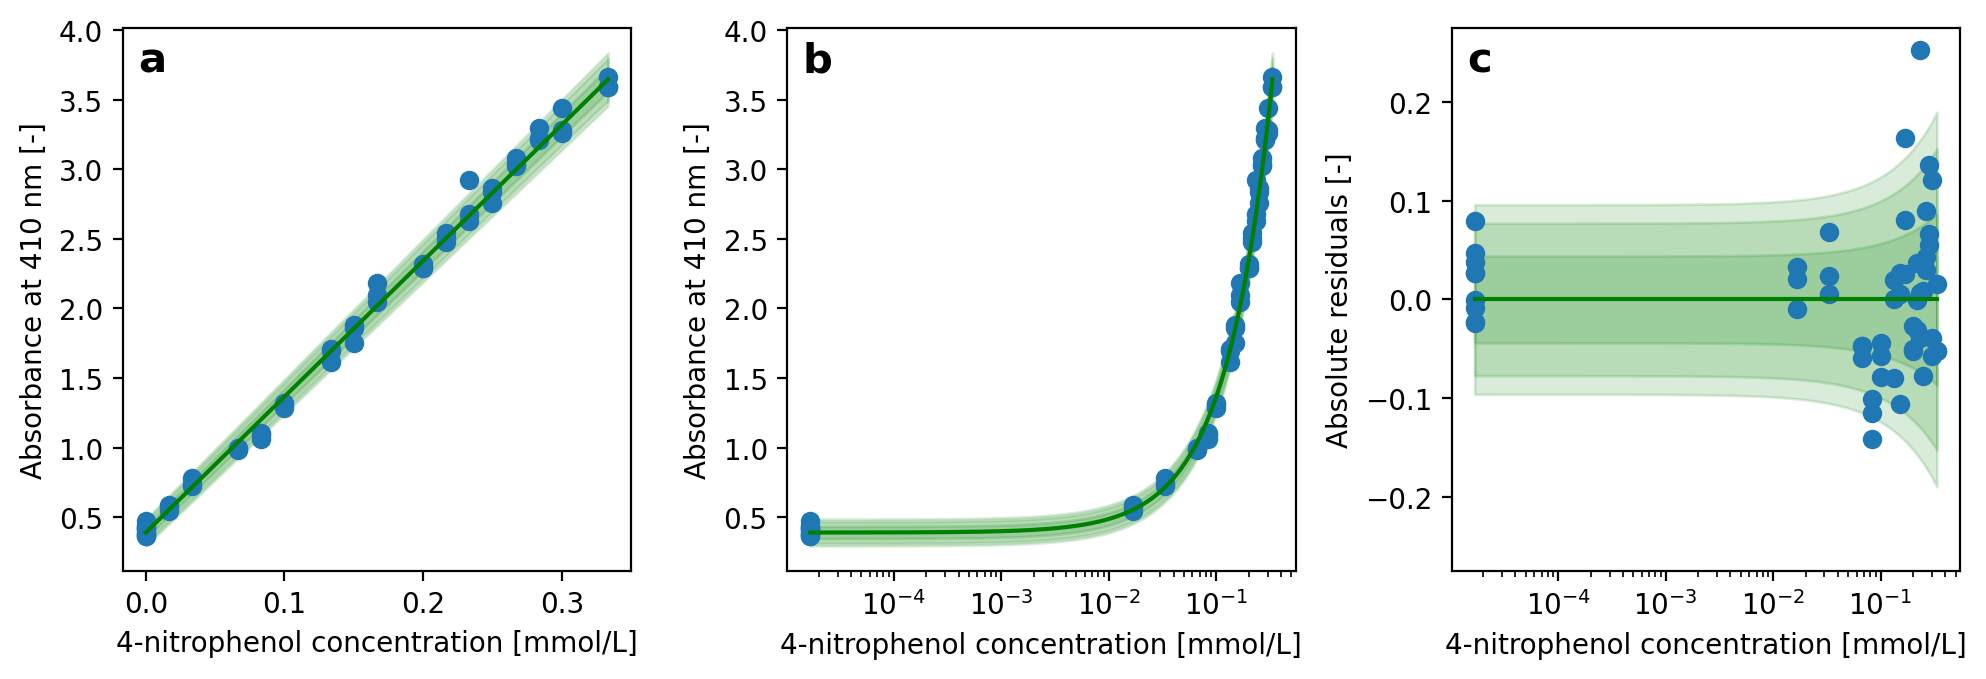

In [6]:
fig, axs = pyplot.subplots(figsize=(10,3.5), dpi=200, ncols=3)
fig, axs = calibr8.plot_model(cm_nitrophenol, fig=fig, axs=axs)
for i, ax in enumerate(axs.flatten()):
    ax.text(0.03, 0.92, string.ascii_lowercase[i], transform=ax.transAxes, size=15, weight='bold')
    ax.set_xlabel("4-nitrophenol concentration [mmol/L]")
    ax.set_ylabel("Absorbance at 410 nm [-]")
axs[2].set_ylabel("Absolute residuals [-]")
pyplot.tight_layout()
pyplot.savefig(fr"{resultpath}\{RUN_ID}_cm_nitrophenol.png", dpi=200)
pyplot.show()